Exploratory data analysis (EDA) is a crucial component of data science which allows you to understand the basics of what your data looks like and what kinds of questions might be answered. For this task, we are going to clean, sanitise and explore our data. Using the automobile dataset, complete the steps outlined in this notebook by writing code in the cells.

In [1]:
# Import libraries

import numpy as np
import pandas as pd
import seaborn as sns
import ast, json

from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Load the Cars dataset 
automobile_df = pd.read_csv('automobile.txt')

### Data Cleansing
#### Clean the data

Identify columns that are redundant or unnecessary. It is always easier to make your decisions based on data which is relevant and concise. Remove the following columns `['normalized-losses', 'engine-location', 'bore', 'stroke', 'compression-ratio', 'wheel-base', 'peak-rpm']` from the data set as they will not be used in the analysis.

In [3]:
# list of columns to remove
columns_to_drop = ['normalized-losses', 'engine-location', 'bore', 'stroke', 'compression-ratio', 'wheel-base', 'peak-rpm']
automobile_df = automobile_df.drop(columns=columns_to_drop)

automobile_df.head(10)

,symboling,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,horsepower,city-mpg,highway-mpg,price
0,3,alfa-romero,gas,std,two,convertible,rwd,168.8,64.1,48.8,2548,dohc,four,130,mpfi,111,21,27,13495
1,3,alfa-romero,gas,std,two,convertible,rwd,168.8,64.1,48.8,2548,dohc,four,130,mpfi,111,21,27,16500
2,1,alfa-romero,gas,std,two,hatchback,rwd,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,154,19,26,16500
3,2,audi,gas,std,four,sedan,fwd,176.6,66.2,54.3,2337,ohc,four,109,mpfi,102,24,30,13950
4,2,audi,gas,std,four,sedan,4wd,176.6,66.4,54.3,2824,ohc,five,136,mpfi,115,18,22,17450
5,2,audi,gas,std,two,sedan,fwd,177.3,66.3,53.1,2507,ohc,five,136,mpfi,110,19,25,15250
6,1,audi,gas,std,four,sedan,fwd,192.7,71.4,55.7,2844,ohc,five,136,mpfi,110,19,25,17710
7,1,audi,gas,std,four,wagon,fwd,192.7,71.4,55.7,2954,ohc,five,136,mpfi,110,19,25,18920
8,1,audi,gas,turbo,four,sedan,fwd,192.7,71.4,55.9,3086,ohc,five,131,mpfi,140,17,20,23875
9,0,audi,gas,turbo,two,hatchback,4wd,178.2,67.9,52.0,3053,ohc,five,131,mpfi,160,16,22,?


#### Remove any duplicate rows

In [4]:
# Removing the duplicate rows from the DataFrame
automobile_df = automobile_df.drop_duplicates()

# Reset the index after removing duplicates
automobile_df.reset_index(drop=True, inplace=True)

#### Remove rows with missing data 

Some automobiles in the database have zero or unknown price/ horsepower which implies that their values have not been recorded or some information is missing. Discard such entries from the dataframe.

In [5]:
# Define the columns with missing data represented as '?'
columns_with_missing_data = ['horsepower', 'price']

# Remove rows with missing data in any of the specified columns
for column in columns_with_missing_data:
    automobile_df = automobile_df[(automobile_df[column] != '?')]

# Reset the index after removing rows
automobile_df.reset_index(drop=True, inplace=True)

automobile_df.head(10)

,symboling,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,horsepower,city-mpg,highway-mpg,price
0,3,alfa-romero,gas,std,two,convertible,rwd,168.8,64.1,48.8,2548,dohc,four,130,mpfi,111,21,27,13495
1,3,alfa-romero,gas,std,two,convertible,rwd,168.8,64.1,48.8,2548,dohc,four,130,mpfi,111,21,27,16500
2,1,alfa-romero,gas,std,two,hatchback,rwd,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,154,19,26,16500
3,2,audi,gas,std,four,sedan,fwd,176.6,66.2,54.3,2337,ohc,four,109,mpfi,102,24,30,13950
4,2,audi,gas,std,four,sedan,4wd,176.6,66.4,54.3,2824,ohc,five,136,mpfi,115,18,22,17450
5,2,audi,gas,std,two,sedan,fwd,177.3,66.3,53.1,2507,ohc,five,136,mpfi,110,19,25,15250
6,1,audi,gas,std,four,sedan,fwd,192.7,71.4,55.7,2844,ohc,five,136,mpfi,110,19,25,17710
7,1,audi,gas,std,four,wagon,fwd,192.7,71.4,55.7,2954,ohc,five,136,mpfi,110,19,25,18920
8,1,audi,gas,turbo,four,sedan,fwd,192.7,71.4,55.9,3086,ohc,five,131,mpfi,140,17,20,23875
9,2,bmw,gas,std,two,sedan,rwd,176.8,64.8,54.3,2395,ohc,four,108,mpfi,101,23,29,16430


Change 'horsepower', 'city-mpg', 'highway-mpg', 'price' columns to an integer data type using numpy’s `int64` method.

In [6]:
# Convert selected columns to int64
columns_to_convert = ['horsepower', 'city-mpg', 'highway-mpg', 'price']

for column in columns_to_convert:
    automobile_df[column] = automobile_df[column].astype(np.int64)

In [7]:
automobile_df.dtypes

symboling             int64
make                 object
fuel-type            object
aspiration           object
num-of-doors         object
body-style           object
drive-wheels         object
length              float64
width               float64
height              float64
curb-weight           int64
engine-type          object
num-of-cylinders     object
engine-size           int64
fuel-system          object
horsepower            int64
city-mpg              int64
highway-mpg           int64
price                 int64
dtype: object

### Finding Certain Makes
Locate all cars in the "audi" make. 

In [8]:
# Creating a dataframe with all the cars in the "audi" make

# Filter cars with make "audi"
audi_cars = automobile_df[automobile_df['make'].str.contains("audi")]

# Display the first few rows of the "audi" car make DataFrame
audi_cars.head()

,symboling,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,horsepower,city-mpg,highway-mpg,price
3,2,audi,gas,std,four,sedan,fwd,176.6,66.2,54.3,2337,ohc,four,109,mpfi,102,24,30,13950
4,2,audi,gas,std,four,sedan,4wd,176.6,66.4,54.3,2824,ohc,five,136,mpfi,115,18,22,17450
5,2,audi,gas,std,two,sedan,fwd,177.3,66.3,53.1,2507,ohc,five,136,mpfi,110,19,25,15250
6,1,audi,gas,std,four,sedan,fwd,192.7,71.4,55.7,2844,ohc,five,136,mpfi,110,19,25,17710
7,1,audi,gas,std,four,wagon,fwd,192.7,71.4,55.7,2954,ohc,five,136,mpfi,110,19,25,18920


### Now onto the exploration

#### Identify relationships between variables (features)

The main goal here is to identify and create relationships that can help you formulate ideas. We have defined questions to help you identify some relationships to explore.

#### Which are the 5 most expensive cars? 

How do the most expensive and cheapest cars compare? Exploring the most expensive cars highlights if some cars are worth the money spent on them based on their performance and revenue generated.

In [9]:
# Find the 5 most expensive cars
most_expensive_cars = automobile_df.nlargest(5, 'price')
most_expensive_cars.head()

,symboling,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,horsepower,city-mpg,highway-mpg,price
71,1,mercedes-benz,gas,std,two,hardtop,rwd,199.2,72.0,55.4,3715,ohcv,eight,304,mpfi,184,14,16,45400
15,0,bmw,gas,std,two,sedan,rwd,193.8,67.9,53.7,3380,ohc,six,209,mpfi,182,16,22,41315
70,0,mercedes-benz,gas,std,four,sedan,rwd,208.1,71.7,56.7,3900,ohcv,eight,308,mpfi,184,14,16,40960
125,3,porsche,gas,std,two,convertible,rwd,168.9,65.0,51.6,2800,ohcf,six,194,mpfi,207,17,25,37028
16,0,bmw,gas,std,four,sedan,rwd,197.0,70.9,56.3,3505,ohc,six,209,mpfi,182,15,20,36880


#### What are the top 5 fastest cars? 

Compare the min and max horsepower of cars. The comparison helps us identify the different speeds and helps identify what columns may assist in the speed increase/ decrease.

In [10]:
# Find the top 5 fastest cars
fastest_cars = automobile_df.nlargest(5, 'horsepower')
fastest_cars.head()

,symboling,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,horsepower,city-mpg,highway-mpg,price
46,0,jaguar,gas,std,two,sedan,rwd,191.7,70.6,47.8,3950,ohcv,twelve,326,mpfi,262,13,17,36000
123,3,porsche,gas,std,two,hardtop,rwd,168.9,65.0,51.6,2756,ohcf,six,194,mpfi,207,17,25,32528
124,3,porsche,gas,std,two,hardtop,rwd,168.9,65.0,51.6,2756,ohcf,six,194,mpfi,207,17,25,34028
125,3,porsche,gas,std,two,convertible,rwd,168.9,65.0,51.6,2800,ohcf,six,194,mpfi,207,17,25,37028
102,3,nissan,gas,turbo,two,hatchback,rwd,170.7,67.9,49.7,3139,ohcv,six,181,mpfi,200,17,23,19699


In [11]:
# Find the lowest 5 horsepower cars
slowest_cars = automobile_df.nsmallest(5, 'horsepower')
slowest_cars.head()

,symboling,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,horsepower,city-mpg,highway-mpg,price
17,2,chevrolet,gas,std,two,hatchback,fwd,141.1,60.3,53.2,1488,l,three,61,2bbl,48,47,53,5151
176,2,volkswagen,diesel,std,two,sedan,fwd,171.7,65.5,55.7,2261,ohc,four,97,idi,52,37,46,7775
178,2,volkswagen,diesel,std,four,sedan,fwd,171.7,65.5,55.7,2264,ohc,four,97,idi,52,37,46,7995
87,1,nissan,diesel,std,two,sedan,fwd,165.3,63.8,54.5,2017,ohc,four,103,idi,55,45,50,7099
152,0,toyota,diesel,std,four,sedan,fwd,166.3,64.4,53.0,2275,ohc,four,110,idi,56,34,36,7898


#### Find the most insurance risk rating cars (symboling). 
Sort the dataframe based on the symboling column.

In [12]:
unique_symboling_values = automobile_df['symboling'].unique()

# Printing the unique symboling values
print(unique_symboling_values)

[ 3  1  2  0 -1 -2]


In [36]:
highest_symbol_cars = automobile_df.nlargest(5, 'symboling')

#Cars with the highest symboling values
highest_symbol_cars.head()

,symboling,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,length,width,height,total_size,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,horsepower,city-mpg,highway-mpg,price
0,3,alfa-romero,gas,std,two,convertible,rwd,168.8,64.1,48.8,281.7,2548,dohc,four,130,mpfi,111,21,27,13495
1,3,alfa-romero,gas,std,two,convertible,rwd,168.8,64.1,48.8,281.7,2548,dohc,four,130,mpfi,111,21,27,16500
28,3,dodge,gas,turbo,two,hatchback,fwd,173.2,66.3,50.2,289.7,2811,ohc,four,156,mfi,145,19,24,12964
52,3,mazda,gas,std,two,hatchback,rwd,169.0,65.7,49.6,284.3,2380,rotor,two,70,4bbl,101,17,23,10945
53,3,mazda,gas,std,two,hatchback,rwd,169.0,65.7,49.6,284.3,2380,rotor,two,70,4bbl,101,17,23,11845


In [38]:
lowest_symbol_cars = automobile_df.nsmallest(5, 'symboling')

# Cars with the lowest symboling values
lowest_symbol_cars.head()

,symboling,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,length,width,height,total_size,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,horsepower,city-mpg,highway-mpg,price
188,-2,volvo,gas,std,four,sedan,rwd,188.8,67.2,56.2,312.2,2912,ohc,four,141,mpfi,114,23,28,12940
190,-2,volvo,gas,std,four,sedan,rwd,188.8,67.2,56.2,312.2,2935,ohc,four,141,mpfi,114,24,28,15985
192,-2,volvo,gas,turbo,four,sedan,rwd,188.8,67.2,56.2,312.2,3045,ohc,four,130,mpfi,162,17,22,18420
27,-1,dodge,gas,std,four,wagon,fwd,174.6,64.6,59.8,299.0,2535,ohc,four,122,2bbl,88,24,30,8921
64,-1,mercedes-benz,diesel,turbo,four,sedan,rwd,190.9,70.3,56.5,317.7,3515,ohc,five,183,idi,123,22,25,25552


#### Find Cars which are the largest in size

In [15]:
# Total size of a car ('length,' + 'width,' + 'height') and add to dataframe
automobile_df['total_size'] = automobile_df['length'] + automobile_df['width'] + automobile_df['height']

# choosing the location to insert total_size and adding after height
insert_location = automobile_df.columns.get_loc('height') + 1

# Insert the 'total_size' column after height
automobile_df.insert(insert_location, 'total_size', automobile_df.pop('total_size'))

# Display to check
automobile_df.head()

,symboling,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,length,width,height,total_size,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,horsepower,city-mpg,highway-mpg,price
0,3,alfa-romero,gas,std,two,convertible,rwd,168.8,64.1,48.8,281.7,2548,dohc,four,130,mpfi,111,21,27,13495
1,3,alfa-romero,gas,std,two,convertible,rwd,168.8,64.1,48.8,281.7,2548,dohc,four,130,mpfi,111,21,27,16500
2,1,alfa-romero,gas,std,two,hatchback,rwd,171.2,65.5,52.4,289.1,2823,ohcv,six,152,mpfi,154,19,26,16500
3,2,audi,gas,std,four,sedan,fwd,176.6,66.2,54.3,297.1,2337,ohc,four,109,mpfi,102,24,30,13950
4,2,audi,gas,std,four,sedan,4wd,176.6,66.4,54.3,297.3,2824,ohc,five,136,mpfi,115,18,22,17450


#### Most expensive make of cars
Create a bar plot showing the average price of each make of car

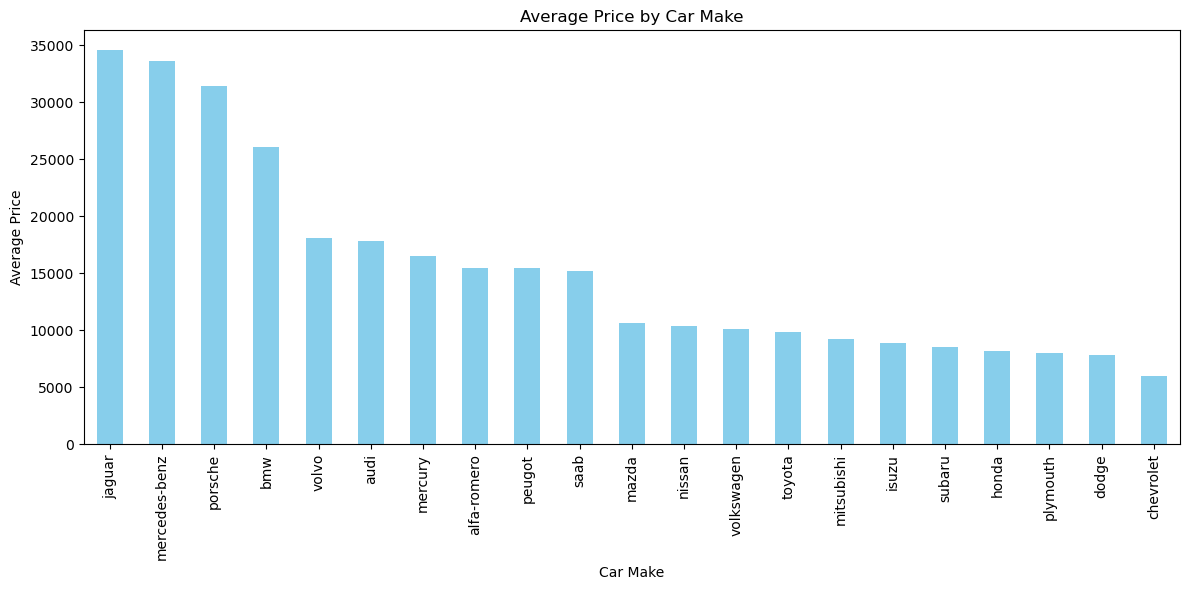

In [16]:
# Grouping the DataFrame by 'make' and calculate the average price for each
average_price_by_make = automobile_df.groupby('make')['price'].mean()

# Sort average price in descending order
average_price_by_make = average_price_by_make.sort_values(ascending=False)

# Create a bar plot
plt.figure(figsize=(12, 6))
average_price_by_make.plot(kind='bar', color='skyblue')
plt.title('Average Price by Car Make')
plt.xlabel('Car Make')
plt.ylabel('Average Price')
plt.xticks(rotation=90)  # Rotate x-axis labels for readability

# Showing the plot
plt.tight_layout()
plt.show()

#### The graph shows the average price for each make, Jaguar has the highest average pricing and chevrolet as the lowest

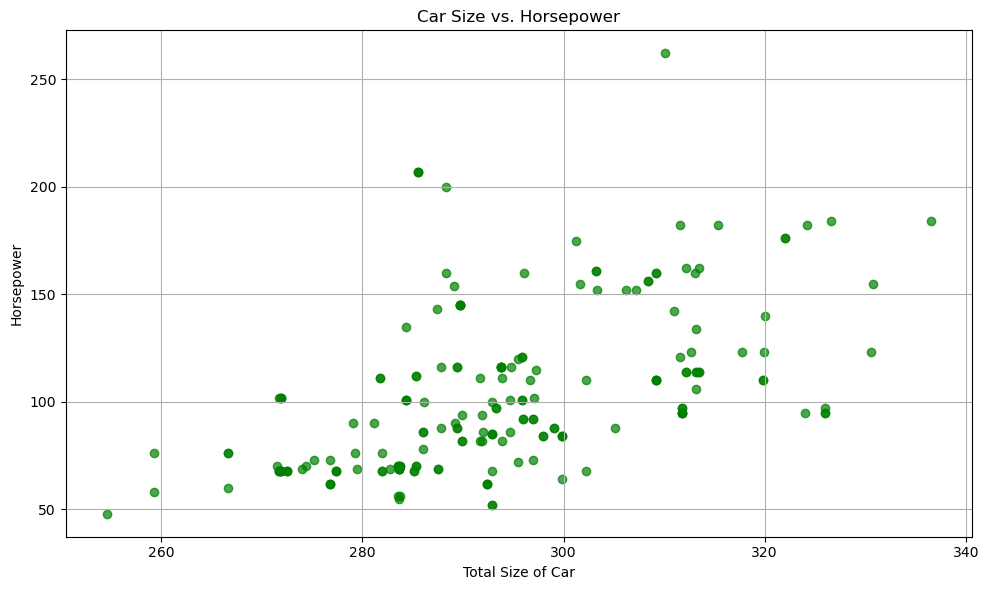

In [25]:
# Scatter plot for total_size vs. horsepower
plt.figure(figsize=(10, 6))
plt.scatter(automobile_df['total_size'], automobile_df['horsepower'], c='green', label='Horsepower', alpha=0.7)

# labels and title
plt.xlabel('Total Size of Car')
plt.ylabel('Horsepower')
plt.title('Car Size vs. Horsepower')

# Showing the plot
plt.grid(True)
plt.tight_layout()
plt.show()

#### The graph shows horsepower to car size, there is a trend that the larger the car the more horsepower is required

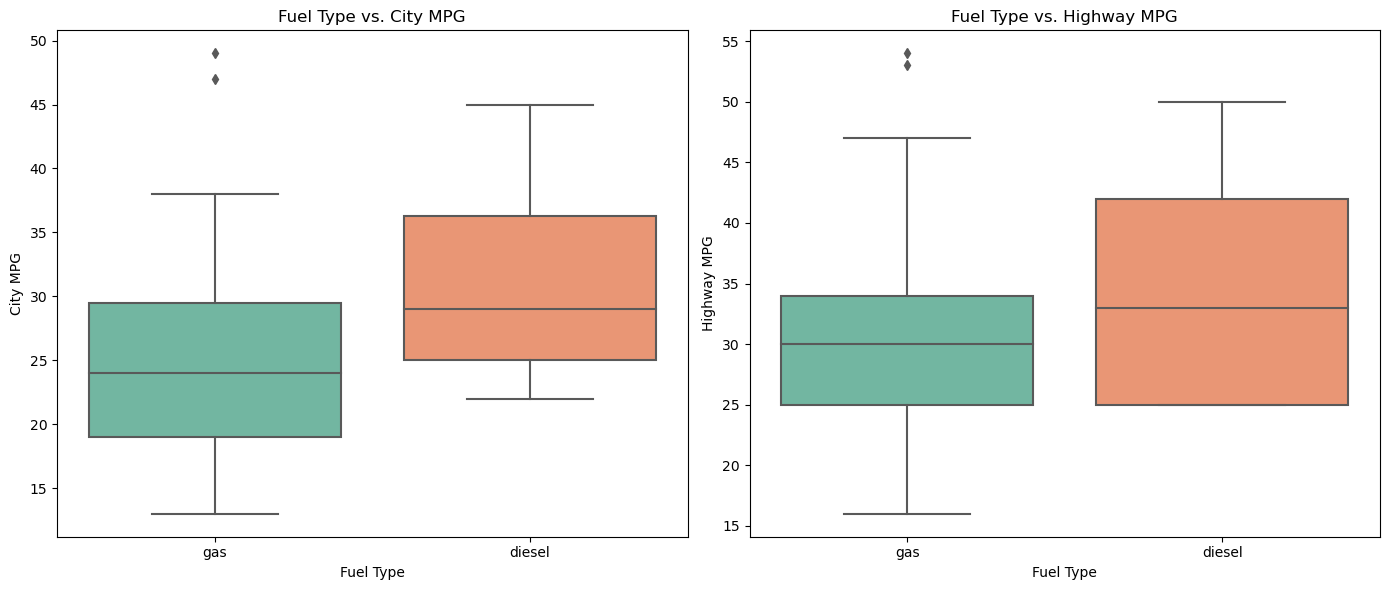

In [27]:
# Subplots with two graphs
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Box plot for city-mpg
sns.boxplot(x='fuel-type', y='city-mpg', data=automobile_df, palette='Set2', ax=ax1)
ax1.set_xlabel('Fuel Type')
ax1.set_ylabel('City MPG')
ax1.set_title('Fuel Type vs. City MPG')

# Box plot for highway-mpg
sns.boxplot(x='fuel-type', y='highway-mpg', data=automobile_df, palette='Set2', ax=ax2)
ax2.set_xlabel('Fuel Type')
ax2.set_ylabel('Highway MPG')
ax2.set_title('Fuel Type vs. Highway MPG')

# Adjusting spacing between subplots
plt.tight_layout()

# Show the plots
plt.show()

#### The graph shows that diesel has a higher city & highway MPG than Gas

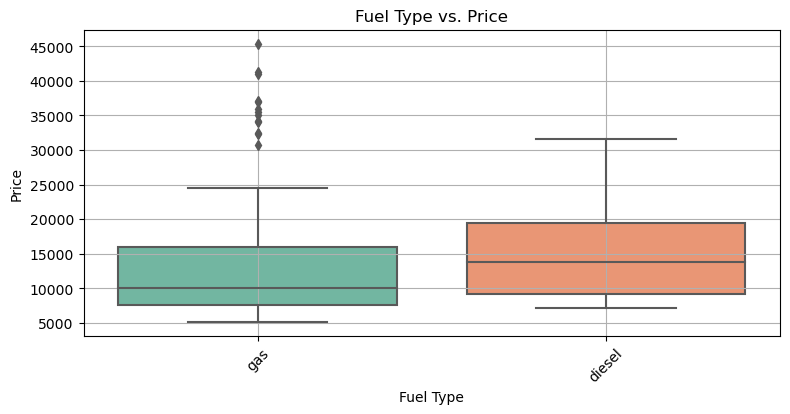

In [30]:
# Create a box plot for price vs. fuel type
plt.figure(figsize=(8, 4))
sns.boxplot(x='fuel-type', y='price', data=automobile_df, palette='Set2')

# Set labels and title
plt.xlabel('Fuel Type')
plt.ylabel('Price')
plt.title('Fuel Type vs. Price')

# Show the plot
plt.grid(True)
plt.tight_layout()
plt.xticks(rotation=45)  # Rotate x-axis labels for readability
plt.show()


#### The graph shows that diesel cars are more expensive however the previous graph shows that the mpg is higher for diesel thus over time it may be a better option gas prices increase

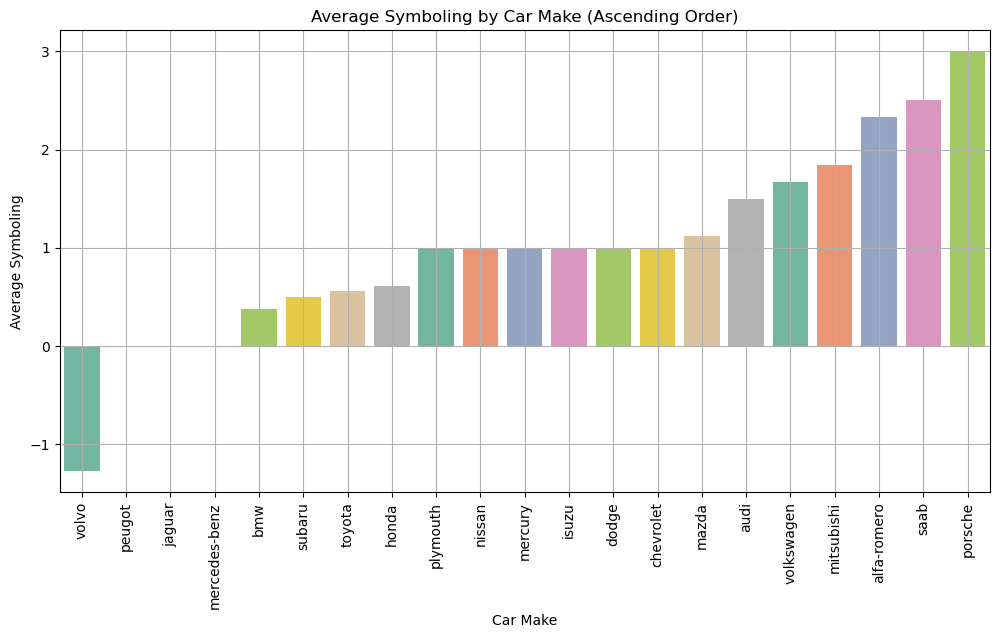

In [34]:
# Calculate the average symboling for each car make
average_symboling_by_make = automobile_df.groupby('make')['symboling'].mean().reset_index()

# Sort the DataFrame by 'symboling' in ascending order
average_symboling_by_make = average_symboling_by_make.sort_values(by='symboling')

plt.figure(figsize=(12, 6))
sns.barplot(x='make', y='symboling', data=average_symboling_by_make, palette='Set2')
plt.xlabel('Car Make')
plt.ylabel('Average Symboling')
plt.title('Average Symboling by Car Make (Ascending Order)')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

#### The graph shows which car makes have low to high insurance risk rating (Symbol), Volvo has a -1 rating and porsche has a 3.

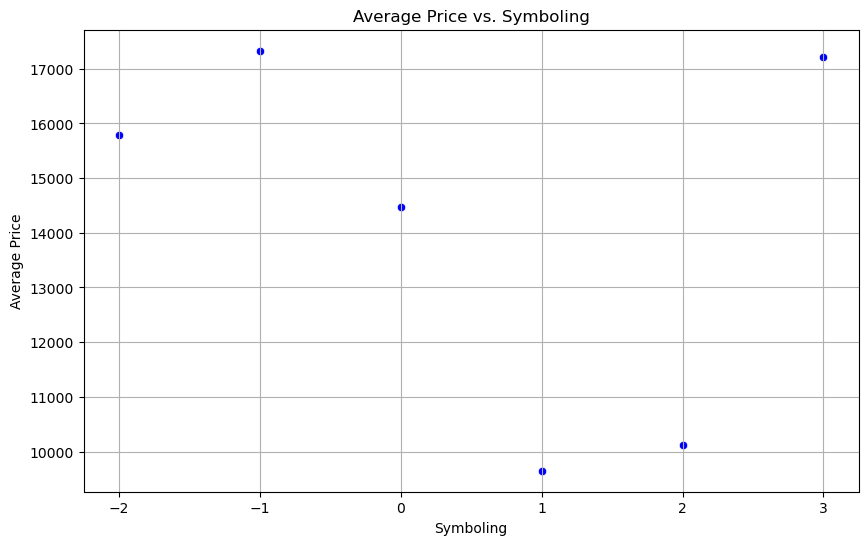

In [33]:
# Average price for each symboling value
average_price_by_symboling = automobile_df.groupby('symboling')['price'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.scatterplot(x='symboling', y='price', data=average_price_by_symboling, marker='o', color='b')
plt.xlabel('Symboling')
plt.ylabel('Average Price')
plt.title('Average Price vs. Symboling')
plt.grid(True)
plt.show()


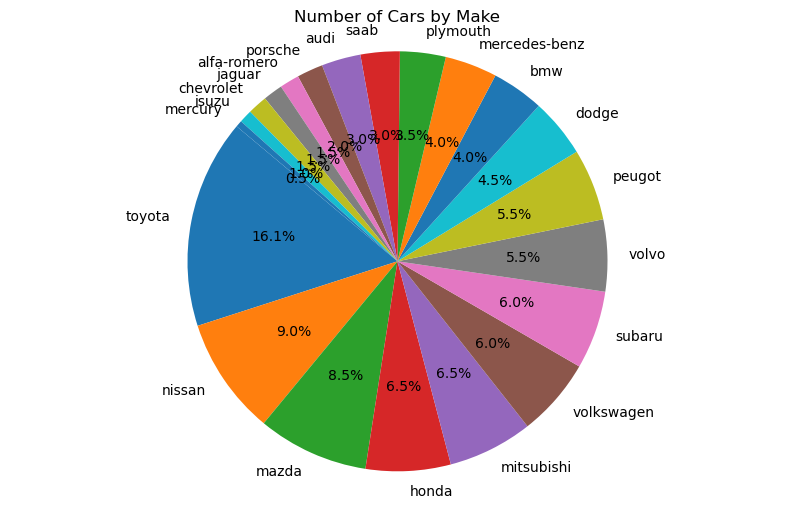

In [23]:
# Number of cars by each make
car_counts = automobile_df['make'].value_counts()

# Pie chart
plt.figure(figsize=(10, 6))
plt.pie(car_counts, labels=car_counts.index, autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.title('Number of Cars by Make')
plt.show()

#### Toyota has a higher variety of cars than all other car makes, The insurance risk for toyota as seen in an above graph 'Average Symboling by Car Make' is below average maybe because of the large variety of cars and less focused designs or possibly that the variety of makes dominate most of the maket meaning more cars have a chance of accidents/ theft.

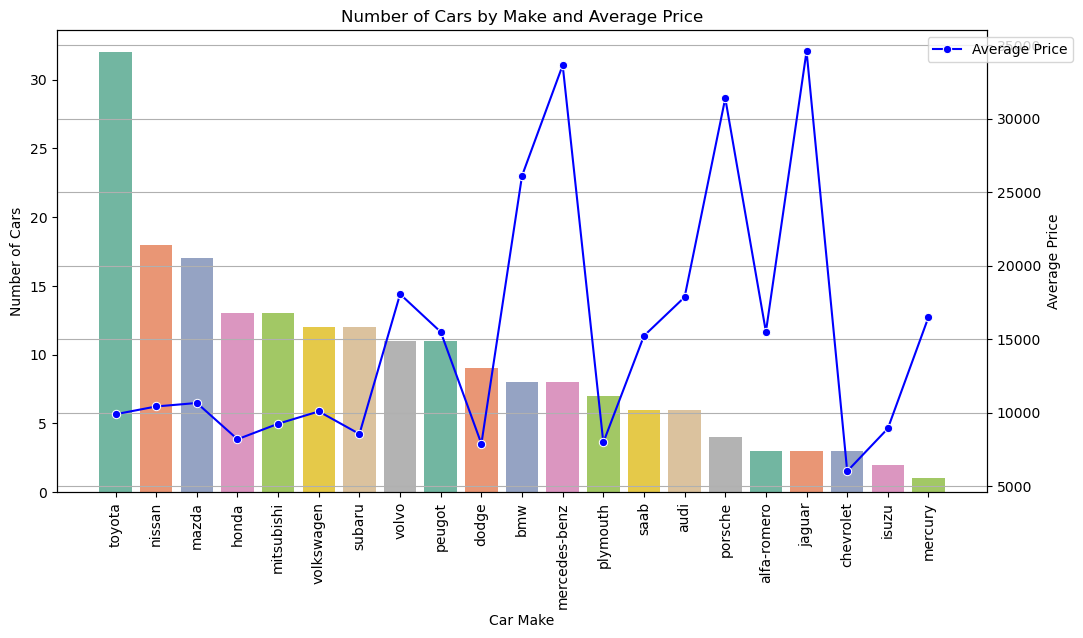

In [35]:
# Calculate the average price for each make
average_price_by_make = automobile_df.groupby('make')['price'].mean().reset_index()

# Number of cars by each make
car_counts = automobile_df['make'].value_counts().reset_index()
car_counts.columns = ['make', 'car_count']

# Merge the average price and car count dataframes
merged_df = average_price_by_make.merge(car_counts, on='make')

# Sort the data by car count in descending order
merged_df = merged_df.sort_values(by='car_count', ascending=False)

# Create a bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x='make', y='car_count', data=merged_df, palette='Set2', label='Number of Cars')
plt.ylabel('Number of Cars')
plt.xlabel('Car Make')
plt.title('Number of Cars by Make and Average Price')
plt.xticks(rotation=90)

# Add a secondary y-axis for average price
ax2 = plt.twinx()
sns.lineplot(x='make', y='price', data=merged_df, marker='o', color='b', label='Average Price', ax=ax2)
ax2.set_ylabel('Average Price')

plt.grid(True, axis='y')
plt.legend(loc='upper right', bbox_to_anchor=(1.1, 1.0))
plt.show()

#### The graph shows that some of the manufacturing companies that make less amount of cars sell them for a lot more, even though dominating the market with variety may generate revenue, concentrating on fewer but more proffessional cars may generate higher profits